In [21]:
import pandas as pd
import numpy as np


In [24]:
data=pd.read_csv('Coursera.csv')
#print(data.head(5))
col= list(data.columns)
print('All columns',col)

## Dropping irrelevant columns like Course URL 
data= data.drop(columns=['Course URL'])

All columns ['Course Name', 'University', 'Difficulty Level', 'Course Rating', 'Course URL', 'Course Description', 'Skills']


In [27]:
## Exploring Course Name 
print(f'Number of unique courses in the dataset {len(data['Course Name'].unique())}')

print(f'All unique values for difficulty level {data['Difficulty Level'].unique()}')
print(f'All unique value for course rating {data['Course Rating'].unique()} ')
print(f'The num of unique skills being taught through these courses {len(data['Skills'].unique())}')

Number of unique courses in the dataset 3416
Number of unique universities 184
All unique values for difficulty level ['Beginner' 'Advanced' 'Intermediate' 'Not Calibrated' 'Conversant']
All unique value for course rating ['4.8' '4.1' '4.6' '4.7' '3.3' '4.9' '4.3' 'Not Calibrated' '4' '4.4'
 '3.4' '4.5' '4.2' '5' '3.5' '3.7' '3' '3.6' '3.8' '3.9' '2.9' '2.6' '2.8'
 '2' '3.1' '3.2' '2.5' '2.4' '1' '1.9' '2.3'] 
The num of unique skills being taught through these courses 3424


In [28]:
# Checking for null values
data.isna().values.any()

False

Basic visualization of each feature and its distribution 

#### Univeristy -  Established university with the most courses in the network is UIUC, followed by John Hopkin, Uni of Michigan and Uni of Boulder. The coursera project-led courses are dominant in the dataset ####

Number of unique universities 184
University
Coursera Project Network                                     562
University of Illinois at Urbana-Champaign                   138
Johns Hopkins University                                     110
University of Michigan                                       101
University of Colorado Boulder                               101
University of California, Irvine                              88
Google Cloud                                                  88
IBM                                                           84
University of Colorado System                                 83
University of California San Diego                            81
University of Minnesota                                       56
Duke University                                               55
University of California, Davis                               54
University of Virginia                                        51
The State University of New York             

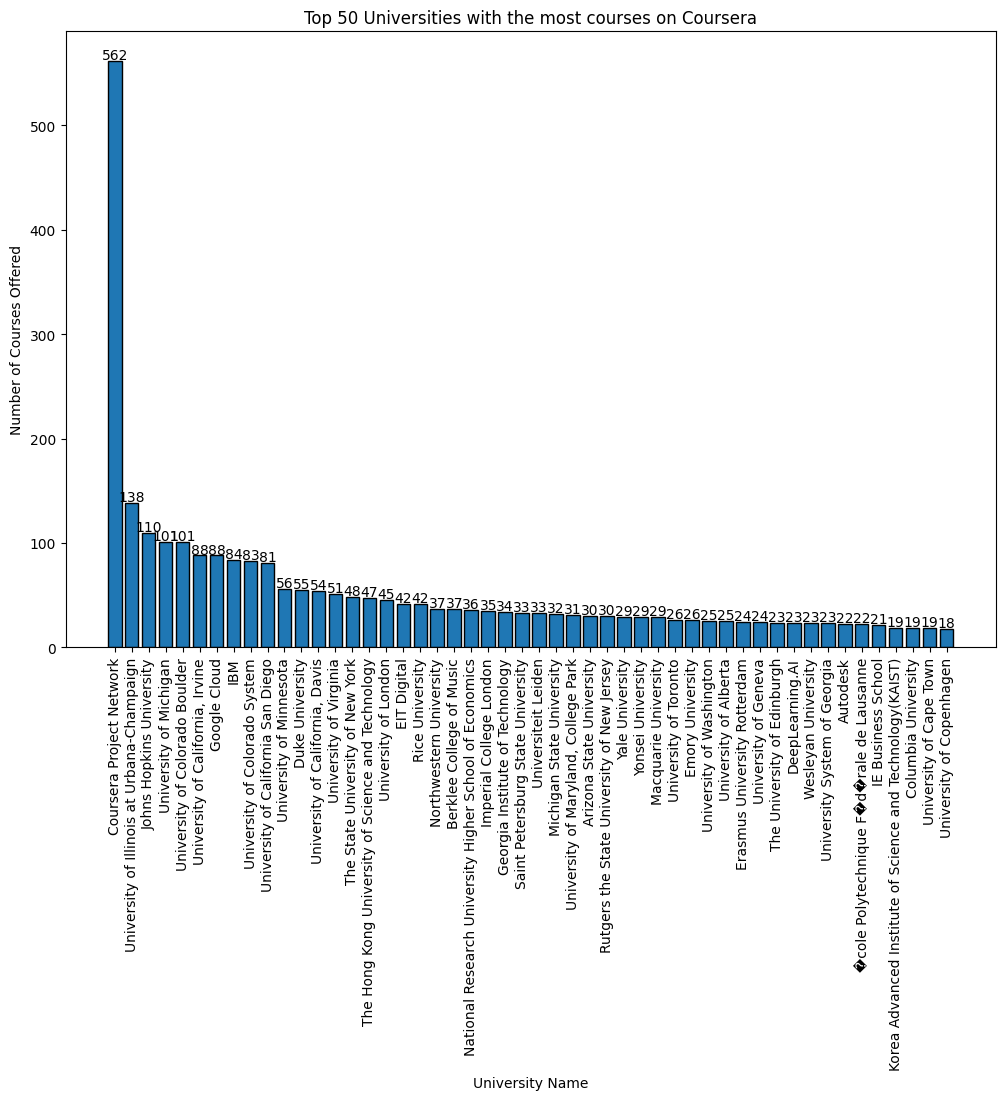

In [104]:
## University 
print(f'Number of unique universities {len(data['University'].unique())}')
import matplotlib.pyplot as plt
df2=data.groupby('University')['Course Name'].count()
df2=df2.sort_values(ascending=False)
## plot the top 25 univeristy with the most courses in Coursera
top50= df2.iloc[0:50]

print(top50)

plt.figure(figsize=(12,8))
bars = plt.bar(top50.index, top50.values, edgecolor='black')

# Annotate each bar with the university name
for bar, value in zip(bars, top50.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1, f'{value}', ha='center', va='bottom', color='black')

# Add labels and title
plt.title('Top 50 Universities with the most courses on Coursera')
plt.xlabel('University Name')
plt.ylabel('Number of Courses Offered')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

## Feature: Difficulty Level -- The majority of courses are rated as Beginner level with the 2nd most popular category are Advanced and Intermediate 

<BarContainer object of 5 artists>

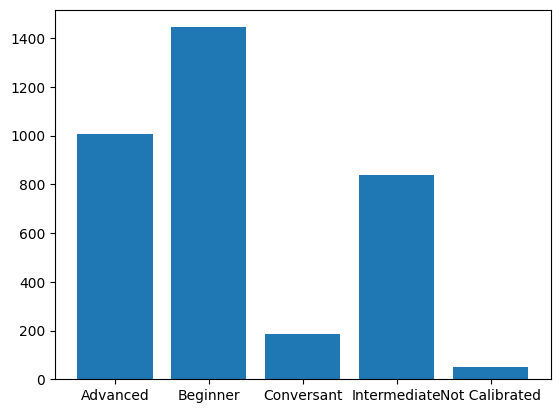

In [103]:
df3=data.groupby(['Difficulty Level'],as_index=False).count()
plt.bar(x=df3['Difficulty Level'],height=df3['Course Name'])



Since Coursera Project Network has the most courses offering in Coursera, it is not suprised to see more than 80% of its are for beginner levels. Followed by advance courses offering at establised institution like UIUC, University of Colorado Boulder and UC San diego

In [121]:
df31=data.groupby(['University','Difficulty Level'],as_index=False)['Course Name'].count().sort_values(by=['Course Name','University'],ascending=False)
df31=df31.rename(columns={'Course Name':'Number of Courses'}).reset_index(drop=True)


,University,Difficulty Level,Number of Courses
0,Coursera Project Network,Beginner,463
1,University of Illinois at Urbana-Champaign,Advanced,73
2,Coursera Project Network,Advanced,59
3,University of Colorado Boulder,Advanced,47
4,University of California San Diego,Advanced,47


## Rating Feature

Text(0.5, 1.0, ' Number of courses per rating')

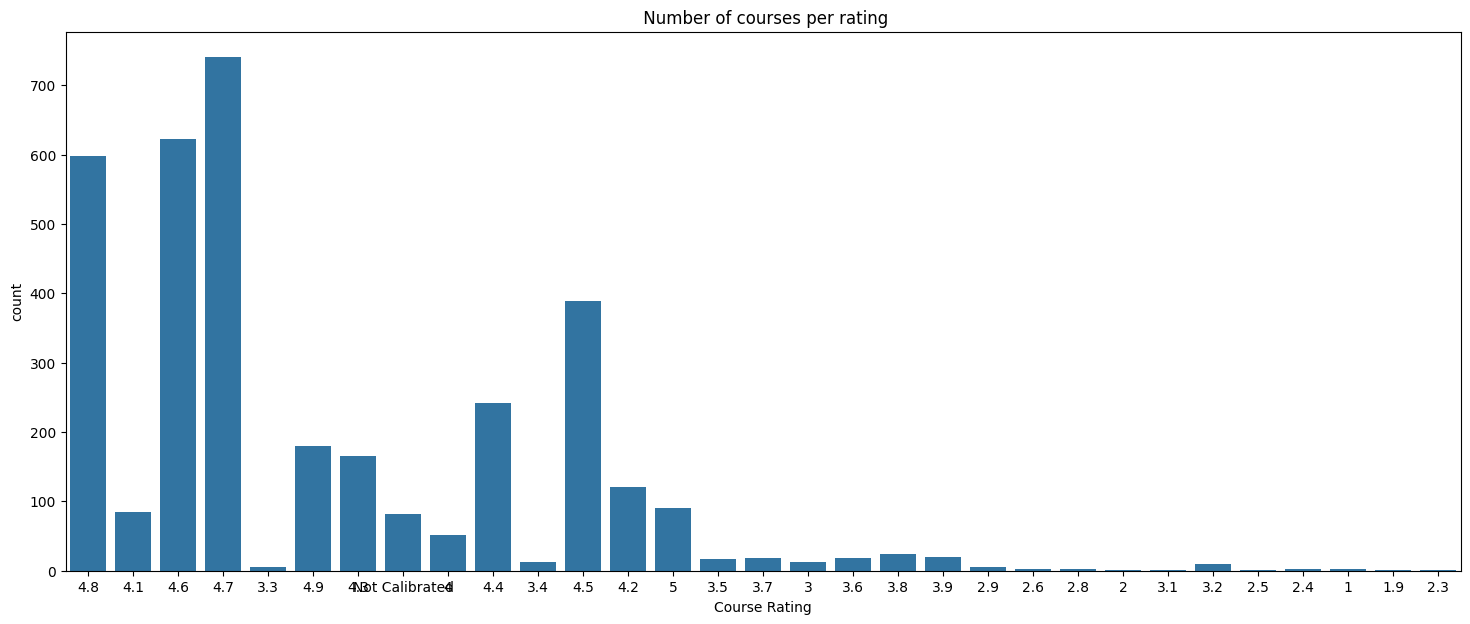

In [129]:
import seaborn as sns
plt.figure(figsize=(18,7))
sns.countplot(data,x='Course Rating')
plt.title(' Number of courses per rating')

In [83]:
data.columns

Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course Description', 'Skills'],
      dtype='object')